In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
df = pd.read_csv('Resources/postgres.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
target = df["stroke"]
target_names = ["condition", "stroke"]

In [5]:
data = df.drop(["stroke","gender","ever_married","work_type","Residence_type","smoking_status"], axis=1)
feature_names = data.columns
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,80.0,0,1,105.92,32.5
2,49.0,0,0,171.23,34.4
3,79.0,1,0,174.12,24.0
4,81.0,0,0,186.21,29.0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [7]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.949


In [9]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.95      1.00      0.97      1164
      stroke       0.00      0.00      0.00        63

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227



C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Support vector machine poly classifier
from sklearn.svm import SVC 
model = SVC(kernel='poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

In [11]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.949


In [12]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.95      1.00      0.97      1164
      stroke       0.00      0.00      0.00        63

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227



C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcus garnham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Support vector machine sigmoid classifier
from sklearn.svm import SVC 
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [14]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.948


In [15]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.95      1.00      0.97      1164
      stroke       0.00      0.00      0.00        63

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227



# undersampling 

In [16]:
strokes = len(df[df['stroke'] == 1])
print(strokes)

209


In [17]:
df_strokes = df[df['stroke'] == 1 ]
df_strokes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
204,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
205,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
206,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
207,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [18]:
#no_strokes = df[df.stroke == 0].index
#print(no_strokes)
no_strokes = df[df['stroke'] == 0 ]
no_strokes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
209,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
210,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
211,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
212,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
213,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4903,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4904,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4905,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4906,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [19]:
no_strokes_2 = no_strokes.sample(n=strokes*4, replace=False)
no_strokes_2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3671,Female,57.0,0,0,Yes,Private,Urban,94.63,33.0,never smoked,0
1017,Male,47.0,1,0,Yes,Private,Urban,110.25,44.3,never smoked,0
4679,Female,5.0,0,0,No,children,Rural,88.44,18.0,Unknown,0
2256,Female,62.0,1,0,Yes,Self-employed,Rural,74.32,34.0,never smoked,0
1245,Male,55.0,1,0,Yes,Self-employed,Rural,82.81,44.3,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
2151,Male,28.0,0,0,No,Govt_job,Urban,118.66,32.3,never smoked,0
598,Female,43.0,0,0,Yes,Self-employed,Urban,98.09,17.3,never smoked,0
2130,Female,5.0,0,0,No,children,Rural,73.69,24.8,Unknown,0
3248,Male,24.0,0,0,No,Private,Rural,200.14,37.7,smokes,0


In [20]:
Undersample_concat = pd.concat([no_strokes_2, df_strokes])
Undersample_concat

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3671,Female,57.0,0,0,Yes,Private,Urban,94.63,33.0,never smoked,0
1017,Male,47.0,1,0,Yes,Private,Urban,110.25,44.3,never smoked,0
4679,Female,5.0,0,0,No,children,Rural,88.44,18.0,Unknown,0
2256,Female,62.0,1,0,Yes,Self-employed,Rural,74.32,34.0,never smoked,0
1245,Male,55.0,1,0,Yes,Self-employed,Rural,82.81,44.3,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
204,Female,68.0,1,1,Yes,Private,Urban,247.51,40.5,formerly smoked,1
205,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
206,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
207,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1


In [21]:
target2 = Undersample_concat["stroke"]
target_names2 = ["condition", "stroke"]

In [22]:
data2 = Undersample_concat.drop(["stroke","gender","ever_married","work_type","Residence_type","smoking_status"], axis=1)
feature_names2 = data2.columns
data2

,age,hypertension,heart_disease,avg_glucose_level,bmi
3671,57.0,0,0,94.63,33.0
1017,47.0,1,0,110.25,44.3
4679,5.0,0,0,88.44,18.0
2256,62.0,1,0,74.32,34.0
1245,55.0,1,0,82.81,44.3
...,...,...,...,...,...
204,68.0,1,1,247.51,40.5
205,57.0,0,0,84.96,36.7
206,14.0,0,0,57.93,30.9
207,75.0,0,0,78.80,29.3


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2, target2, random_state=42)

In [145]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)
THRESHOLD = 0.15
preds = np.where(model.predict_proba(X_test)[:,5] > THRESHOLD, 1, 0)

IndexError: index 5 is out of bounds for axis 1 with size 2

In [138]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.855


In [139]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.86      0.99      0.92       214
      stroke       0.81      0.27      0.41        48

    accuracy                           0.85       262
   macro avg       0.84      0.63      0.66       262
weighted avg       0.85      0.85      0.82       262



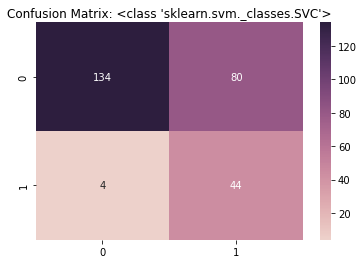

In [140]:
#testing
cf_matrix = confusion_matrix(y_test, preds)
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()
#dont reduce to much
#printed format with 4 numbers
#confusion matrix for training and end result

In [146]:
y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[211,   3],
       [ 35,  13]], dtype=int64)

In [142]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")
print('true negative', tn, '\n',
      'false positive', fp, '\n',
      'false negative', fn, '\n',
      'true positive', tp, '\n')

Accuracy: 0.8549618320610687
true negative 211 
 false positive 3 
 false negative 35 
 true positive 13 



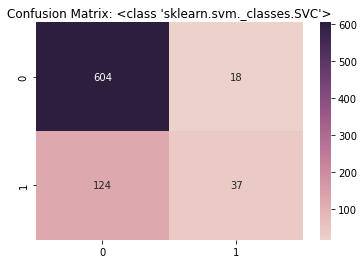

In [144]:
#raining
cf_matrix = confusion_matrix(y_train, model.predict(X_train))
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

In [135]:
y_true = y_train
y_pred = model.predict(X_train)
confusion_matrix(y_true, y_pred)

array([[604,  18],
       [124,  37]], dtype=int64)

In [136]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")
print('true negative', tn, '\n',
      'false positive', fp, '\n',
      'false negative', fn, '\n',
      'true positive', tp, '\n')

Accuracy: 0.8186462324393359
true negative 604 
 false positive 18 
 false negative 124 
 true positive 37 



In [79]:
# Support vector machine poly classifier
from sklearn.svm import SVC 
model = SVC(kernel='poly', probability=True)
model.fit(X_train, y_train)
THRESHOLD = 0.15
preds = np.where(model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [80]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.855


In [81]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.86      0.99      0.92       214
      stroke       0.81      0.27      0.41        48

    accuracy                           0.85       262
   macro avg       0.84      0.63      0.66       262
weighted avg       0.85      0.85      0.82       262



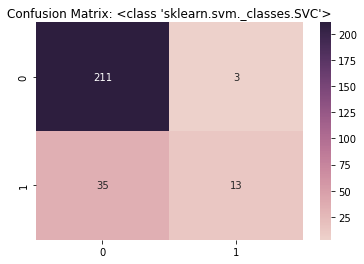

In [82]:
#testing
cf_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

In [83]:
y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[211,   3],
       [ 35,  13]], dtype=int64)

In [84]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")
print('true negative', tn, '\n',
      'false positive', fp, '\n',
      'false negative', fn, '\n',
      'true positive', tp, '\n')

Accuracy: 0.8549618320610687
true negative 211 
 false positive 3 
 false negative 35 
 true positive 13 



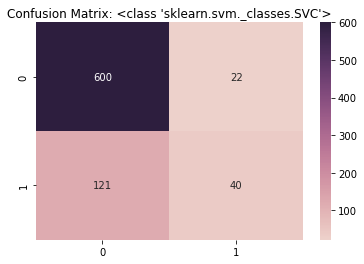

In [85]:
#training
cf_matrix = confusion_matrix(y_train, model.predict(X_train))
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

In [86]:
y_true = y_train
y_pred = model.predict(X_train)
confusion_matrix(y_true, y_pred)

array([[600,  22],
       [121,  40]], dtype=int64)

In [87]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")
print('true negative', tn, '\n',
      'false positive', fp, '\n',
      'false negative', fn, '\n',
      'true positive', tp, '\n')

Accuracy: 0.8173690932311622
true negative 600 
 false positive 22 
 false negative 121 
 true positive 40 



In [75]:
# Support vector machine sigmoid classifier
from sklearn.svm import SVC 
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [76]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.695


In [77]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   condition       0.80      0.83      0.82       214
      stroke       0.12      0.10      0.11        48

    accuracy                           0.69       262
   macro avg       0.46      0.47      0.46       262
weighted avg       0.68      0.69      0.69       262



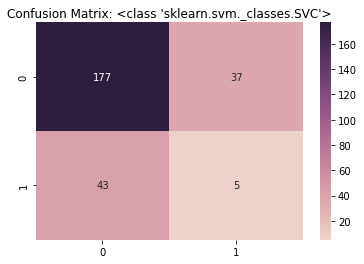

In [78]:
#testing
cf_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.title('Confusion Matrix: {}'.format(SVC))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()